In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [19]:
df = pd.read_csv(r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\Nascar_Data.csv")

In [20]:
df.head()

,Driver,Points,Poles,Wins,Top5,Top10,Winnings ($)
0,Tony Stewart,2403,1,5,9,19,6.53
1,Carl Edwards,2403,3,1,19,26,8.49
2,Kevin Harvick,2345,0,4,9,19,6.20
3,Matt Kenseth,2330,3,3,12,20,6.18
4,Brad Keselowski,2319,1,3,10,14,5.09


In [21]:
# Drop columns
df = df.drop(columns=['Driver'])
df.head()

,Points,Poles,Wins,Top5,Top10,Winnings ($)
0,2403,1,5,9,19,6.53
1,2403,3,1,19,26,8.49
2,2345,0,4,9,19,6.20
3,2330,3,3,12,20,6.18
4,2319,1,3,10,14,5.09


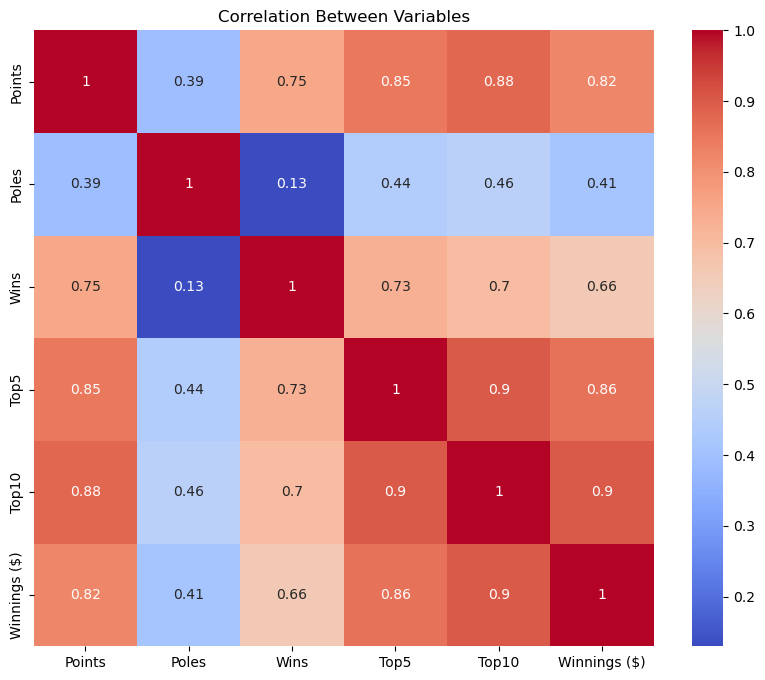

In [22]:
correl = df.corr()

correl = correl.round(2)

plt.figure(figsize=(10,8))
sns.heatmap(correl, annot=True, cmap='coolwarm')
plt.title('Correlation Between Variables')
plt.show()

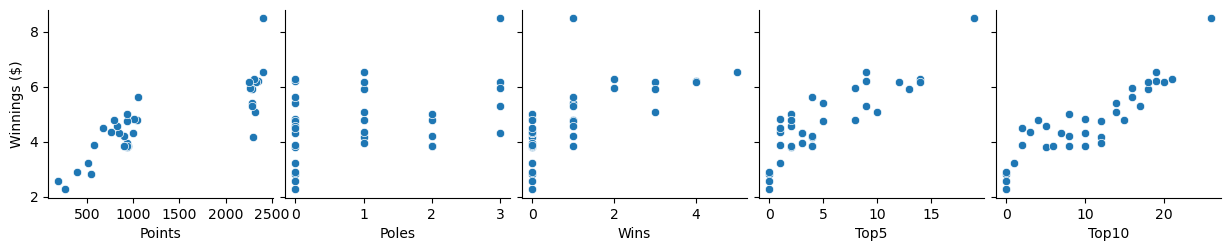

In [23]:
sns.pairplot(df, x_vars=['Points', 'Poles', 'Wins', 'Top5', 'Top10'], y_vars=['Winnings ($)'])
plt.show()

In [24]:
print(df.describe())

            Points      Poles       Wins       Top5      Top10  Winnings ($)
count    35.000000  35.000000  35.000000  35.000000  35.000000     35.000000
mean   1304.200000   0.942857   1.000000   5.114286  10.228571      4.706286
std     766.567705   1.109925   1.393261   4.861441   7.145899      1.288321
min     192.000000   0.000000   0.000000   0.000000   0.000000      2.270000
25%     807.500000   0.000000   0.000000   1.500000   4.500000      3.870000
50%     937.000000   1.000000   0.000000   4.000000  10.000000      4.580000
75%    2284.000000   2.000000   1.000000   8.500000  16.000000      5.515000
max    2403.000000   3.000000   5.000000  19.000000  26.000000      8.490000


In [25]:
#Regression Analysis

X = df.drop(columns=['Winnings ($)'])
y = df['Winnings ($)']

X = sm.add_constant(X)

linear_regression = sm.OLS(y,X)
full_regression = linear_regression.fit()

print(full_regression.summary())


                            OLS Regression Results                            
Dep. Variable:           Winnings ($)   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     26.57
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           5.32e-10
Time:                        10:28:01   Log-Likelihood:                -27.934
No. Observations:                  35   AIC:                             67.87
Df Residuals:                      29   BIC:                             77.20
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1134      0.227     13.701      0.0

In [26]:
#VIF
vifries = pd.DataFrame()
vifries['variable'] = X.columns

vifries['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifries)

  variable       VIF
0    const  5.183090
1   Points  5.595687
2    Poles  1.431099
3     Wins  2.770014
4     Top5  6.233818
5    Top10  7.453503


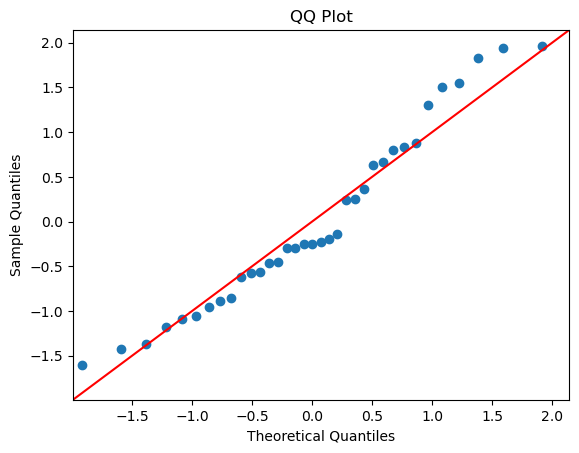

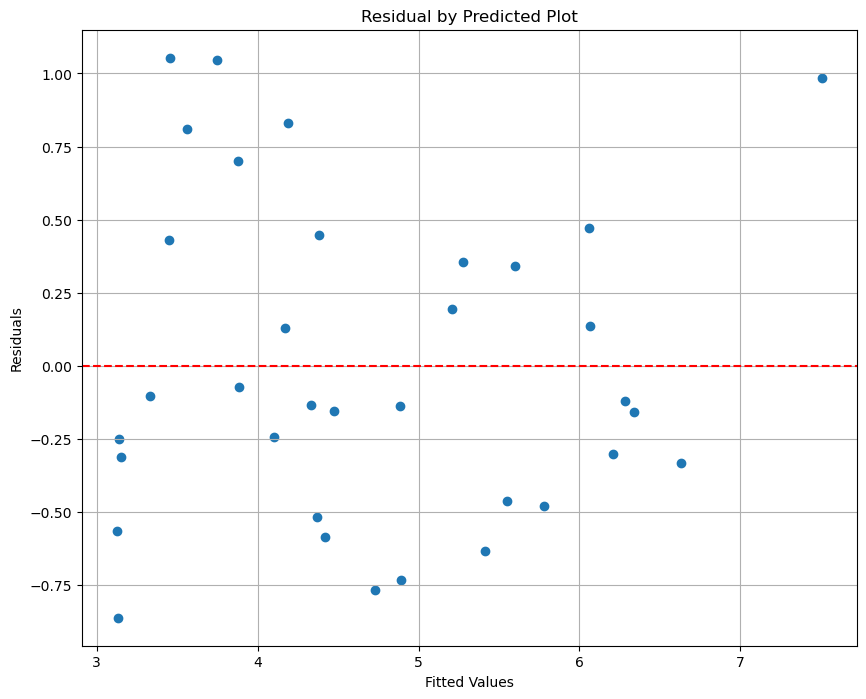

In [27]:
residuals = full_regression.resid

qq_plot = sm.qqplot(residuals, fit=True, line='45')
plt.title('QQ Plot')
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(full_regression.fittedvalues, residuals)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Residual by Predicted Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()


In [28]:
df = df.drop(columns=['Points', 'Poles', 'Wins'])
df.head()
df.shape

(35, 3)

In [29]:
X = df.drop(columns=['Winnings ($)'])
y = df['Winnings ($)']

X = sm.add_constant(X)

regression_final = sm.OLS(y,X).fit()

print(regression_final.summary())

                            OLS Regression Results                            
Dep. Variable:           Winnings ($)   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     73.01
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           1.19e-12
Time:                        10:28:01   Log-Likelihood:                -27.990
No. Observations:                  35   AIC:                             61.98
Df Residuals:                      32   BIC:                             66.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1362      0.176     17.811      0.0

In [31]:
vif = pd.DataFrame()

vif['Variable'] = X.columns

vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

  Variable       VIF
0    const  3.423140
1     Top5  5.351715
2    Top10  5.351715


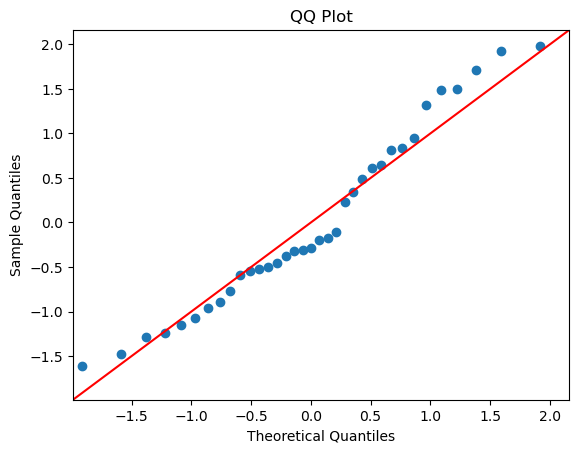

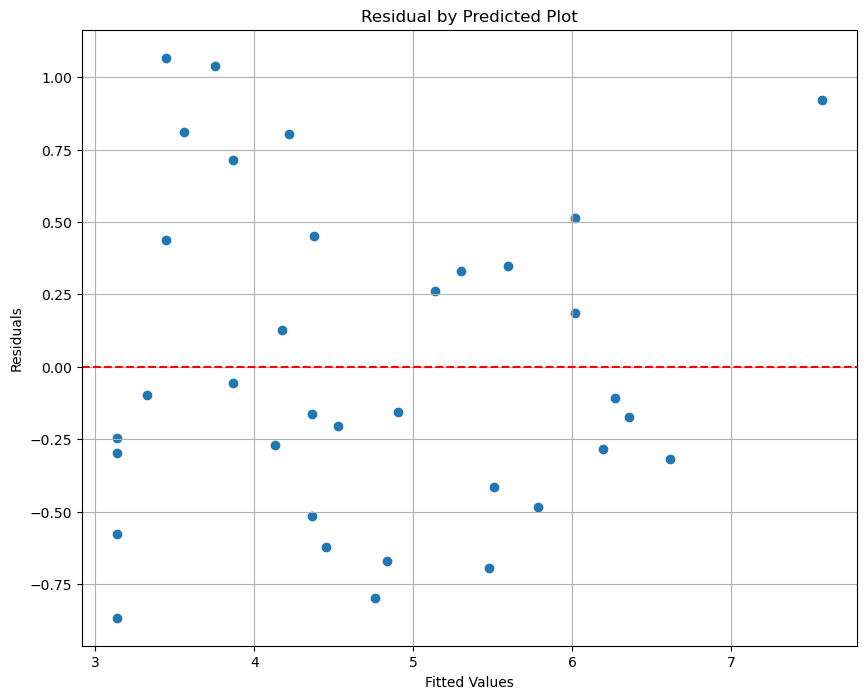

In [32]:
residuals = regression_final.resid

qq_plot = sm.qqplot(residuals, fit=True, line='45')
plt.title('QQ Plot')
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(regression_final.fittedvalues, residuals)
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.title('Residual by Predicted Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True)
plt.show()